In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import  train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score,confusion_matrix,roc_auc_score,f1_score
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
#!wget https://lazyprogrammer.me/course_files/spam.csv


In [3]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
# Drop unnecessary cols
df = df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


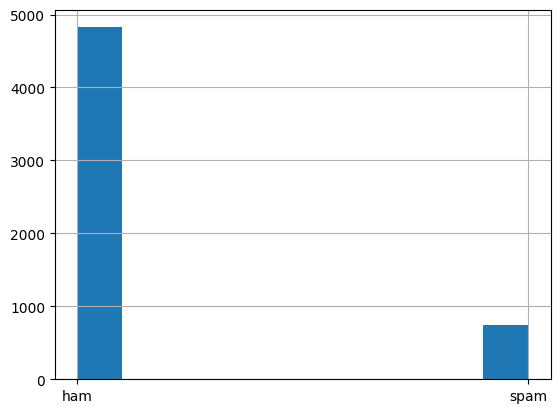

In [7]:
df.labels.hist();

In [8]:
# Create bnary labels
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
y = df['b_labels'].to_numpy()

In [9]:
# Split the data
df_train,df_test, y_train,y_test = train_test_split(df['data'],y,test_size=0.33)

In [10]:
# Try multiple ways to calculating features
# 1 TF-IDF vectorizer
# vectorizer = TfidfVectorizer(decode_error='ignore')
# X_train = vectorizer.fit_transform(df_train)
# X_test = vectorizer.transform(df_test)

#2 Countvectorzer
vectorizer = CountVectorizer(decode_error='ignore')
X_train = vectorizer.fit_transform(df_train)
X_test = vectorizer.transform(df_test)

In [11]:
X_train

<3733x7094 sparse matrix of type '<class 'numpy.int64'>'
	with 49846 stored elements in Compressed Sparse Row format>

In [12]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(X_train,y_train)

print('Train score:',model.score(X_train,y_train))
print('Test score:',model.score(X_test,y_test))

Train score: 0.9930350924189659
Test score: 0.9853181076672104


In [13]:
# Checking F1-score of train and test
p_train = model.predict(X_train)
p_test = model.predict(X_test)

print('Train f1-score:',f1_score(y_train,p_train))
print('Test f1-score:',f1_score(y_test,p_test))


Train f1-score: 0.974459724950884
Test f1-score: 0.9409190371991247


In [16]:
# Checking AUC score of train and test
prob_train = model.predict_proba(X_train)[:,1]
prob_test = model.predict_proba(X_test)[:,1]

print('Train AUC',roc_auc_score(y_train,prob_train))
print('Test AUC',roc_auc_score(y_test,prob_test))


Train AUC 0.9935209125659732
Test AUC 0.9797527457950868


In [17]:
cm = confusion_matrix(y_train,p_train)

In [18]:
cm

array([[3211,   10],
       [  16,  496]])

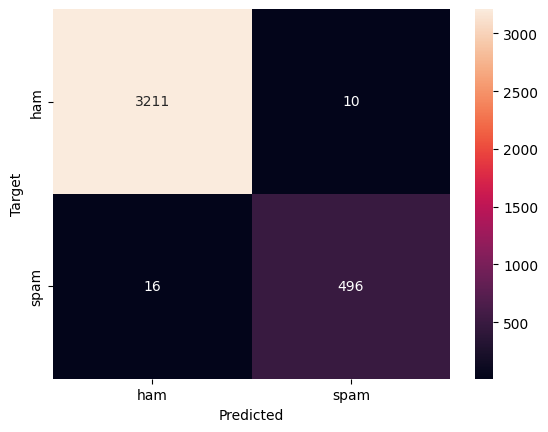

In [20]:
def plot_cm(cm):
  classes = ['ham','spam']
  df_cm = pd.DataFrame(cm,index=classes,columns=classes)
  ax = sns.heatmap(df_cm,annot=True,fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Target')

plot_cm(cm)

In [21]:
cm_test = confusion_matrix(y_test, p_test)
cm_test

array([[1597,    7],
       [  20,  215]])

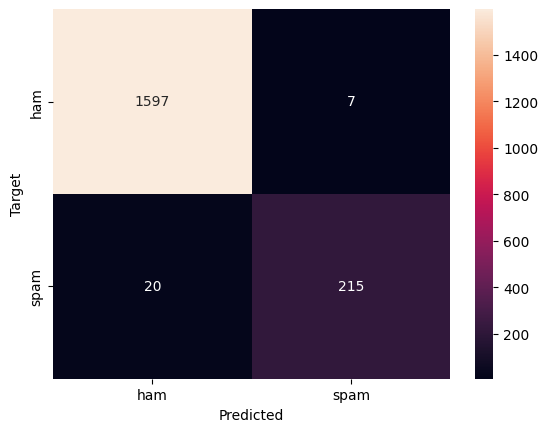

In [22]:
def plot_cm_test(cm):
  classes = ['ham','spam']
  df_cm = pd.DataFrame(cm,index=classes,columns=classes)
  ax = sns.heatmap(df_cm,annot=True,fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Target')

plot_cm_test(cm_test)

In [23]:
# Visualize the data

def visualize(label):
  words = ''
  for msg in df[df['labels']== label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600,height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

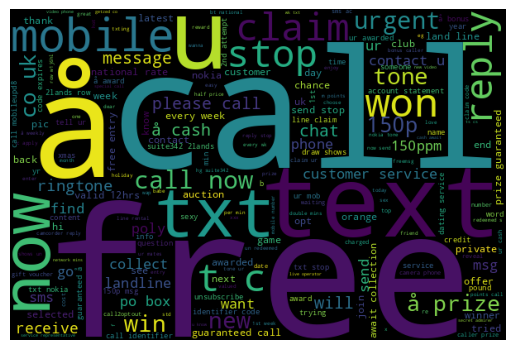

In [24]:
visualize('spam')

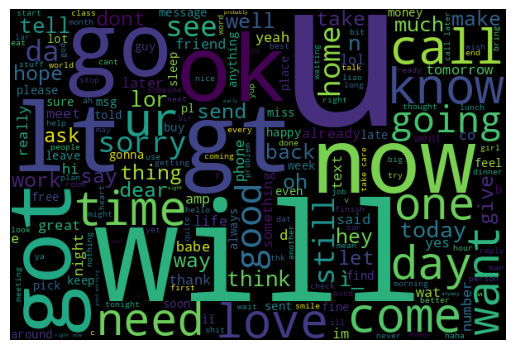

In [25]:
visualize('ham')

In [26]:
# See what we're getting wrong
X = vectorizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [27]:
df.head()

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [28]:
# things that should be spam
sneaky_spam = df[(df['predictions'] ==0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Filthy stories and GIRLS waiting for your
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09

In [29]:
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

No calls..messages..missed calls
Finally the match heading towards draw as your prediction.
No calls..messages..missed calls
Yes:)from last week itself i'm taking live call.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
No calls..messages..missed calls
Also andros ice etc etc
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
